In [34]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from citipy import citipy
# import linear regression from the SciPy stats model
from scipy.stats import linregress 

In [2]:
# create a set of random latitude and longitude combos
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add lat and lngs to a list
coordinates = list(lat_lngs)

In [4]:
# create a list for holding the cities
cities = []
# identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then add to cities list
    if city not in cities:
        cities.append(city)
# print city count to confirm sufficient count
len(cities)

603

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

from datetime import datetime

In [6]:
# starting url for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | cahors
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | belyy yar
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | jiangyou
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | itaquyry
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | obregon
Processing Record 16 of Set 1 | byron bay
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | bur ga

Processing Record 30 of Set 4 | korla
Processing Record 31 of Set 4 | smidovich
Processing Record 32 of Set 4 | sabang
Processing Record 33 of Set 4 | rio cuarto
Processing Record 34 of Set 4 | dingle
Processing Record 35 of Set 4 | puerto ayora
Processing Record 36 of Set 4 | morgan city
Processing Record 37 of Set 4 | sitka
Processing Record 38 of Set 4 | huron
Processing Record 39 of Set 4 | avera
Processing Record 40 of Set 4 | petauke
Processing Record 41 of Set 4 | halifax
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | andradas
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | pishin
Processing Record 46 of Set 4 | el alto
Processing Record 47 of Set 4 | half moon bay
Processing Record 48 of Set 4 | waren
Processing Record 49 of Set 4 | taga
Processing Record 50 of Set 4 | pulandian
Processing Record 1 of Set 5 | falciu
Processing Record 2 of Set 5 | rock sound
Processing Record 3 of Set 5 | ipanema
Processing Record 4 of Set 5 | ro

Processing Record 24 of Set 8 | alice springs
Processing Record 25 of Set 8 | tuatapere
Processing Record 26 of Set 8 | makakilo city
Processing Record 27 of Set 8 | puri
Processing Record 28 of Set 8 | pemangkat
Processing Record 29 of Set 8 | narsaq
Processing Record 30 of Set 8 | natchitoches
Processing Record 31 of Set 8 | nantucket
Processing Record 32 of Set 8 | naze
Processing Record 33 of Set 8 | saint-leu
Processing Record 34 of Set 8 | tual
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | mitsamiouli
Processing Record 37 of Set 8 | wenling
Processing Record 38 of Set 8 | yanan
City not found. Skipping...
Processing Record 39 of Set 8 | cockburn town
Processing Record 40 of Set 8 | odesskoye
Processing Record 41 of Set 8 | kavaratti
Processing Record 42 of Set 8 | costinesti
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | havoysund
Processing Record 45 of Set 8 | port blair
Processing Record 46 of Set 8 | inhambane
Processi

Processing Record 10 of Set 12 | terrasini
Processing Record 11 of Set 12 | kulhudhuffushi
Processing Record 12 of Set 12 | port macquarie
Processing Record 13 of Set 12 | lolua
City not found. Skipping...
Processing Record 14 of Set 12 | san vicente
Processing Record 15 of Set 12 | aykhal
Processing Record 16 of Set 12 | yazd
Processing Record 17 of Set 12 | banda aceh
Processing Record 18 of Set 12 | mantua
Processing Record 19 of Set 12 | puerto escondido
Processing Record 20 of Set 12 | rio gallegos
Processing Record 21 of Set 12 | mouzakion
City not found. Skipping...
Processing Record 22 of Set 12 | pandan
Processing Record 23 of Set 12 | bolotnoye
Processing Record 24 of Set 12 | sisimiut
Processing Record 25 of Set 12 | pacific grove
Processing Record 26 of Set 12 | jiayuguan
Processing Record 27 of Set 12 | shelburne
Processing Record 28 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | rocha
Process

In [8]:
len(city_data)

546

In [9]:
# convert array of dictionaries to a pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,71.01,35,66,12.17,US,2020-08-26 19:46:07
1,Cahors,44.42,1.33,75.99,64,87,3.36,FR,2020-08-26 19:47:08
2,Castro,-24.79,-50.01,65.52,63,0,6.02,BR,2020-08-26 19:47:08
3,New Norfolk,-42.78,147.06,48.00,86,65,1.01,AU,2020-08-26 19:47:08
4,Busselton,-33.65,115.33,48.99,79,48,3.60,AU,2020-08-26 19:47:08
5,Belyy Yar,53.60,91.39,51.80,93,2,4.99,RU,2020-08-26 19:47:08
6,Cidreira,-30.18,-50.21,64.54,79,0,17.63,BR,2020-08-26 19:47:08
7,Kapaa,22.08,-159.32,82.40,74,40,14.99,US,2020-08-26 19:47:09
8,Jiangyou,31.77,104.72,72.03,81,0,2.55,CN,2020-08-26 19:47:09
9,Vaini,-21.20,-175.20,64.40,100,20,3.36,TO,2020-08-26 19:47:09


In [10]:
city_data_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[city_data_columns]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-08-26 19:46:07,42.60,-73.97,71.01,35,66,12.17
1,Cahors,FR,2020-08-26 19:47:08,44.42,1.33,75.99,64,87,3.36
2,Castro,BR,2020-08-26 19:47:08,-24.79,-50.01,65.52,63,0,6.02
3,New Norfolk,AU,2020-08-26 19:47:08,-42.78,147.06,48.00,86,65,1.01
4,Busselton,AU,2020-08-26 19:47:08,-33.65,115.33,48.99,79,48,3.60
5,Belyy Yar,RU,2020-08-26 19:47:08,53.60,91.39,51.80,93,2,4.99
6,Cidreira,BR,2020-08-26 19:47:08,-30.18,-50.21,64.54,79,0,17.63
7,Kapaa,US,2020-08-26 19:47:09,22.08,-159.32,82.40,74,40,14.99
8,Jiangyou,CN,2020-08-26 19:47:09,31.77,104.72,72.03,81,0,2.55
9,Vaini,TO,2020-08-26 19:47:09,-21.20,-175.20,64.40,100,20,3.36


In [11]:
# create the output file (csv)
output_data_file = "weather_data/cities.csv"

# export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

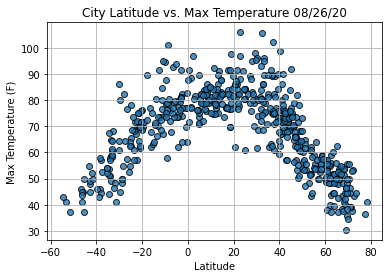

In [13]:
# build scatter plot for latitude vs max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

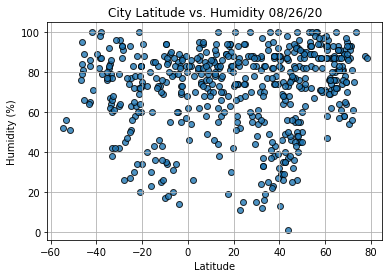

In [14]:
# build scatter plot for latitude vs max temp
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

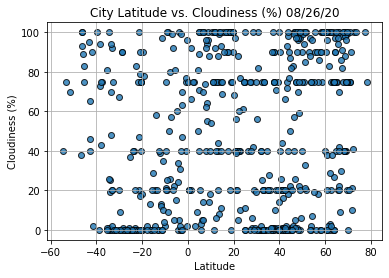

In [15]:
# build scatter plot for latitude vs max temp
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

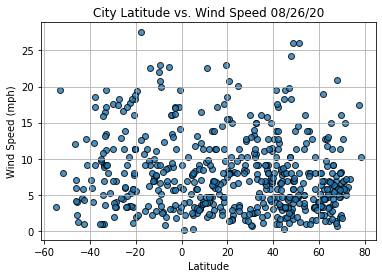

In [16]:
# build scatter plot for latitude vs max temp
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()

In [53]:
# create a function to perfrom linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [54]:
# create Northern and Southern Hemisphere DF's
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

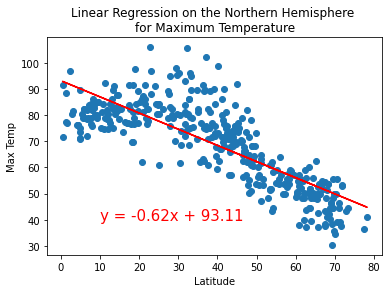

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

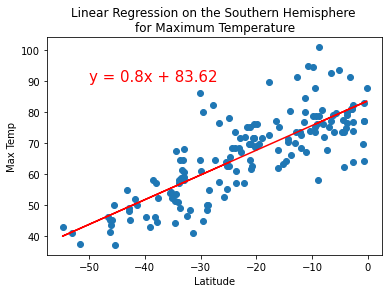

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

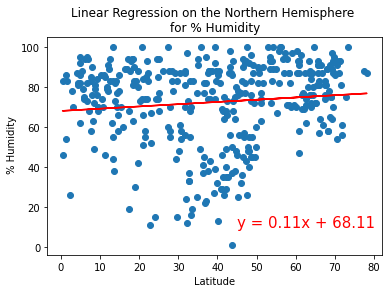

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', ' % Humidity',(45,10))

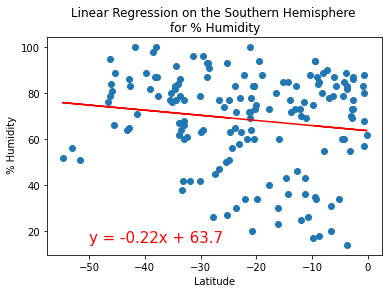

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', ' % Humidity',(-50,15))

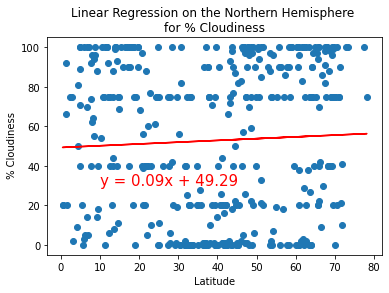

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', ' % Cloudiness',(10,30))

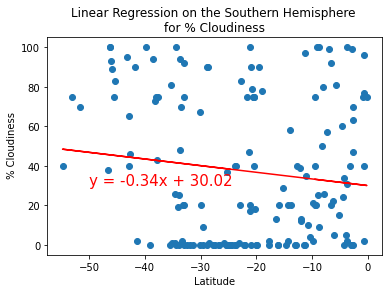

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', ' % Cloudiness',(-50,30))

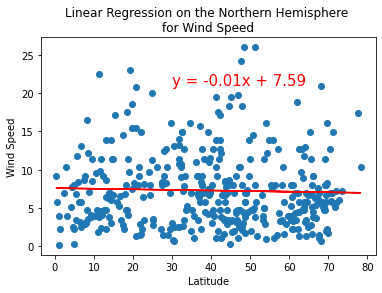

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(30,21))

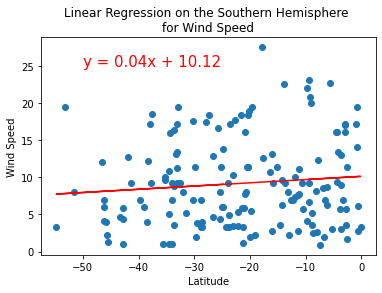

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))